<a href="https://colab.research.google.com/github/tth-97/cgrhyu.github.io/blob/master/dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
from PIL import Image

In [2]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print(device)

cuda


In [21]:
##### AutoEncoder 모델 코드 #####

class Encoder(nn.Module):
    def __init__(self,):
        super(Encoder, self).__init__()
        self.encode = nn.Sequential(nn.Conv2d(3, 6, 5, 1, 0),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, 2),
                                    nn.Conv2d(6, 16, 5, 1, 0),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, 2),
        )
    def forward(self, input):
        return self.encode(input)


class Decoder(nn.Module):
    def __init__(self, ):
        super(Decoder, self).__init__()
        self.decode = nn.Sequential(nn.Conv2d(16, 16, 13, 1, 12),
                                    nn.ReLU(),
                                    nn.Conv2d(16, 16, 13, 1, 12),
                                    nn.ReLU(),
                                    nn.Conv2d(16, 6, 13, 1, 12),
                                    nn.ReLU(),
                                    nn.Conv2d(6, 6, 13, 1, 12),
                                    nn.ReLU(),
                                    nn.Conv2d(6, 6, 13, 1, 12),
                                    nn.ReLU(),
                                    nn.Conv2d(6, 3, 19, 1, 18),
                                    nn.Tanh(),
        )
    def forward(self, input):
        return self.decode(input)
        
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, input):
        z = self.encoder(input)
        x_hat = self.decoder(z)
        return z, x_hat

In [11]:
transform = transforms.Compose([transforms.Resize((100, 100)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.Flowers102(root="StanfordCars/", 
                    split='train', 
                    transform=transform,
                    download=True)
test_dataset = torchvision.datasets.Flowers102(root="StanfordCars/", 
                    split='test',
                    transform=transform,
                    download=True)

In [22]:
##### AutoEncoder 학습 코드 #####

batch_size = 255

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

autoencoder = AutoEncoder().to(device)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

epochs = 100
train_avg_costs = []

autoencoder.train()
for epoch in range(epochs):
    autoencoder.train()
    avg_cost = 0
    total_batch_num = len(train_dataloader)
    
    for b_x, b_y in train_dataloader:
        b_x = b_x.to(device)
        z, b_x_hat = autoencoder(b_x) # forward propagation
        loss = criterion(b_x_hat, b_x) # get cost
        
        avg_cost += loss / total_batch_num
        optimizer.zero_grad()
        loss.backward() # backward propagation
        optimizer.step() # update parameters
    train_avg_costs.append(avg_cost.detach())
    print('Epoch : {} / {}, cost : {}'.format(epoch+1, epochs, avg_cost))

Epoch : 1 / 100, cost : 0.3440823554992676
Epoch : 2 / 100, cost : 0.31680190563201904
Epoch : 3 / 100, cost : 0.2936720848083496
Epoch : 4 / 100, cost : 0.28094446659088135
Epoch : 5 / 100, cost : 0.27322837710380554
Epoch : 6 / 100, cost : 0.26461827754974365
Epoch : 7 / 100, cost : 0.25213783979415894
Epoch : 8 / 100, cost : 0.23423129320144653
Epoch : 9 / 100, cost : 0.22047139704227448
Epoch : 10 / 100, cost : 0.21266785264015198
Epoch : 11 / 100, cost : 0.20569099485874176
Epoch : 12 / 100, cost : 0.19963376224040985
Epoch : 13 / 100, cost : 0.19444279372692108
Epoch : 14 / 100, cost : 0.1890774369239807
Epoch : 15 / 100, cost : 0.18656042218208313
Epoch : 16 / 100, cost : 0.18333964049816132
Epoch : 17 / 100, cost : 0.17921455204486847
Epoch : 18 / 100, cost : 0.17659758031368256
Epoch : 19 / 100, cost : 0.17360910773277283
Epoch : 20 / 100, cost : 0.17109271883964539
Epoch : 21 / 100, cost : 0.167904794216156
Epoch : 22 / 100, cost : 0.16592921316623688
Epoch : 23 / 100, cost :

In [23]:
print(train_avg_costs)

[tensor(0.3441, device='cuda:0'), tensor(0.3168, device='cuda:0'), tensor(0.2937, device='cuda:0'), tensor(0.2809, device='cuda:0'), tensor(0.2732, device='cuda:0'), tensor(0.2646, device='cuda:0'), tensor(0.2521, device='cuda:0'), tensor(0.2342, device='cuda:0'), tensor(0.2205, device='cuda:0'), tensor(0.2127, device='cuda:0'), tensor(0.2057, device='cuda:0'), tensor(0.1996, device='cuda:0'), tensor(0.1944, device='cuda:0'), tensor(0.1891, device='cuda:0'), tensor(0.1866, device='cuda:0'), tensor(0.1833, device='cuda:0'), tensor(0.1792, device='cuda:0'), tensor(0.1766, device='cuda:0'), tensor(0.1736, device='cuda:0'), tensor(0.1711, device='cuda:0'), tensor(0.1679, device='cuda:0'), tensor(0.1659, device='cuda:0'), tensor(0.1668, device='cuda:0'), tensor(0.1669, device='cuda:0'), tensor(0.1649, device='cuda:0'), tensor(0.1626, device='cuda:0'), tensor(0.1604, device='cuda:0'), tensor(0.1579, device='cuda:0'), tensor(0.1563, device='cuda:0'), tensor(0.1563, device='cuda:0'), tensor(0.

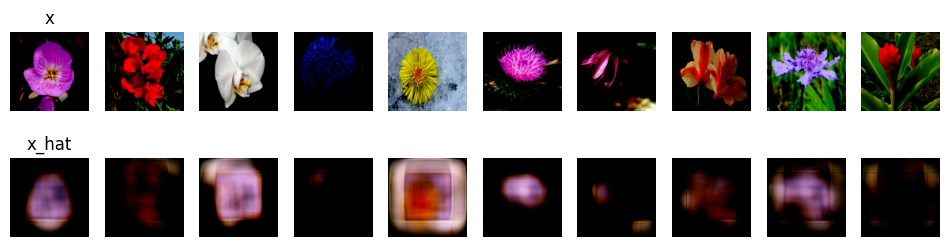

In [24]:
# autoencoder 학습 결과 확인 #

import matplotlib.pyplot as plt
import numpy as np

autoencoder.eval()
test_samples = torch.zeros((10, 3, 100, 100))
for i in range(10):
  test_samples[i] = test_dataset[100*i][0]
test_samples = test_samples.to(device)
z, test_output = autoencoder(test_samples)

fig, ax = plt.subplots(2, 10, figsize=(12,3))
ax[0][0].set_title('x')
ax[1][0].set_title('x_hat')
for i in range(10):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.transpose(test_samples[i].detach().cpu().numpy(), (1,2,0)))
  ax[1][i].imshow(np.transpose(test_output[i].detach().cpu().numpy(), (1,2,0)))
plt.show()

In [42]:
##### Classifier 모델 코드 #####

class Classifier(nn.Module):
    def __init__(self, ):
        super(Classifier, self).__init__()
        self.classify = nn.Sequential(
                                      nn.Conv2d(16, 32, 3, 1, 0),
                                      nn.ReLU(),
                                      nn.MaxPool2d(2, 2),
                                      nn.Conv2d(32, 64, 3, 1, 0),
                                      nn.ReLU(),
                                      nn.MaxPool2d(2, 2),
                                      nn.Flatten(),
                                      nn.Dropout(0.5),
                                      nn.Linear(64*4*4, 512),
                                      nn.ReLU(),
                                      nn.Dropout(0.25),
                                      nn.Linear(512, 102)
        )
    def forward(self, input):
        return self.classify(input)

In [43]:
##### Classifier 학습 코드 #####

classifier = Classifier().to(device)
cls_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    [
        {"params": autoencoder.parameters(), "lr": 0.001},
        {"params": classifier.parameters(), "lr": 0.001},
    ]
)

autoencoder.train()
classifier.train()
total_batch_num = len(train_dataloader)

epochs = 60
classifier_avg_costs = []

for epoch in range(epochs):
  avg_cost = 0

  for b_x, b_y in train_dataloader:
    b_x = b_x.to(device)
    b_y = b_y.to(device)
    z, b_x_hat = autoencoder(b_x)
    logits = classifier(z) # classification
    loss = cls_criterion(logits, b_y) # get cost

    avg_cost += loss / total_batch_num

    optimizer.zero_grad()
    loss.backward() # backward propagation
    optimizer.step() # update param
  
  classifier_avg_costs.append(avg_cost.detach())
  print('Epoch : {} / {}, cost : {}'.format(epoch+1, epochs, avg_cost))

Epoch : 1 / 60, cost : 4.6229705810546875
Epoch : 2 / 60, cost : 4.475905418395996
Epoch : 3 / 60, cost : 4.256008625030518
Epoch : 4 / 60, cost : 4.0529632568359375
Epoch : 5 / 60, cost : 3.883493423461914
Epoch : 6 / 60, cost : 3.6611571311950684
Epoch : 7 / 60, cost : 3.493875026702881
Epoch : 8 / 60, cost : 3.268765926361084
Epoch : 9 / 60, cost : 3.13810658454895
Epoch : 10 / 60, cost : 2.9615116119384766
Epoch : 11 / 60, cost : 2.819254159927368
Epoch : 12 / 60, cost : 2.669872999191284
Epoch : 13 / 60, cost : 2.4652533531188965
Epoch : 14 / 60, cost : 2.3012287616729736
Epoch : 15 / 60, cost : 2.1156349182128906
Epoch : 16 / 60, cost : 2.0142862796783447
Epoch : 17 / 60, cost : 1.827366828918457
Epoch : 18 / 60, cost : 1.641467571258545
Epoch : 19 / 60, cost : 1.5296483039855957
Epoch : 20 / 60, cost : 1.4197906255722046
Epoch : 21 / 60, cost : 1.2663660049438477
Epoch : 22 / 60, cost : 1.187293291091919
Epoch : 23 / 60, cost : 1.0806971788406372
Epoch : 24 / 60, cost : 0.963247

In [44]:
print(classifier_avg_costs)

[tensor(4.6230, device='cuda:0'), tensor(4.4759, device='cuda:0'), tensor(4.2560, device='cuda:0'), tensor(4.0530, device='cuda:0'), tensor(3.8835, device='cuda:0'), tensor(3.6612, device='cuda:0'), tensor(3.4939, device='cuda:0'), tensor(3.2688, device='cuda:0'), tensor(3.1381, device='cuda:0'), tensor(2.9615, device='cuda:0'), tensor(2.8193, device='cuda:0'), tensor(2.6699, device='cuda:0'), tensor(2.4653, device='cuda:0'), tensor(2.3012, device='cuda:0'), tensor(2.1156, device='cuda:0'), tensor(2.0143, device='cuda:0'), tensor(1.8274, device='cuda:0'), tensor(1.6415, device='cuda:0'), tensor(1.5296, device='cuda:0'), tensor(1.4198, device='cuda:0'), tensor(1.2664, device='cuda:0'), tensor(1.1873, device='cuda:0'), tensor(1.0807, device='cuda:0'), tensor(0.9632, device='cuda:0'), tensor(0.9048, device='cuda:0'), tensor(0.8071, device='cuda:0'), tensor(0.7806, device='cuda:0'), tensor(0.7049, device='cuda:0'), tensor(0.6453, device='cuda:0'), tensor(0.5710, device='cuda:0'), tensor(0.

In [45]:
##### Classifier 정확도 측정 코드 #####

correct = 0
total = 0

classifier.eval()
autoencoder.eval()

for b_x, b_y in test_dataloader:
  b_x = b_x.to(device)
  b_y = b_y.to(device)
  with torch.no_grad():
    z, b_x_hat = autoencoder(b_x)
    logits = classifier(z)
  
  predicts = torch.argmax(logits, dim=1)

  total += len(b_y)
  correct += (predicts == b_y).sum().item()

print(f'Accuracy of the netwark on test images: {100 * correct / total} %')

Accuracy of the netwark on test images: 19.90567571962921 %
